In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os
# List all image paths
TRAIN_NOISY_DIR = '/content/drive/MyDrive/imagedenoise/BSDS300/images/train'
# TRAIN_CLEAN_DIR= '/content/drive/MyDrive/imagedenoise/BSDS300/images/train/clean'

In [ ]:
# Create the noisy and clean datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_NOISY_DIR,
    image_size=(448, 384),  # Resize images to 448x384
    batch_size=5,
    label_mode='binary'
)

# train_clean_dataset =a tf.keras.utils.image_dataset_from_directory(
#     TRAIN_CLEAN_DIR,
#     image_size=(448, 384),  # Resize images to 448x384
#     batch_size=10,
#     label_mode=None
# )

Found 400 files belonging to 2 classes.


In [ ]:
rescale_layer = tf.keras.layers.Rescaling(scale=1./255)

In [ ]:
# Combine the noisy and clean datasets
# train_dataset = tf.data.Dataset.zip((train_noisy_dataset, train_clean_dataset))

# Apply the rescaling layer to the combined dataset
# train_dataset_scaled = train_dataset.map(lambda x, y: (rescale_layer(x), rescale_layer(y)))
train_dataset_scaled=train_dataset.map(lambda image,label:(rescale_layer(image),label))

In [ ]:
train_dataset_scaled = train_dataset.map(lambda noisy, clean: (rescale_layer(noisy), rescale_layer(clean)))

In [ ]:
# Get the dimensions of the noisy and clean images
for images in train_noisy_sclaed.take(1):
    noisy_image = images[0]
    print("Noisy image dimensions:", noisy_image.shape)

for images in train_clean_dataset.take(1):
    clean_image = images[0]
    print("Clean image dimensions:", clean_image.shape)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = tf.keras.models.Sequential([
    # Encoder network
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(448, 384, 3)),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),

    # Bottleneck
    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),

    # Decoder network
    layers.Conv2DTranspose(256, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),

    # Output layer
    layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 448, 384, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 224, 192, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 192, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 112, 96, 128)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 96, 256)        │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 56, 48, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 56, 48, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 56, 48, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 112, 96, 256)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 112, 96, 128)        │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 224, 192, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 224, 192, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 448, 384, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 448, 384, 3)         │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,101,443 (11.83 MB)

 Trainable params: 3,101,443 (11.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
# PSNR metric
def psnr_loss(y_true, y_pred):
    max_pixel_value = 255.0
    return tf.image.psnr(y_true, y_pred, max_pixel_value)
input_image = Input(shape=(448, 384, 3))
def ssim_loss(y_true, y_pred):
    return tf.image.ssim(y_true, y_pred, max_val=1.0)


# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_image)
x = MaxPooling2D((2, 2), padding='same')(x)  # (224, 192)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)  # (112, 96)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)  # (56, 48)
x = Flatten()(x)
encoded = Dense(64, activation='relu')(x)

# Decoder
x = Dense(128 * 56 * 48, activation='relu')(encoded)
x = Reshape((56, 48, 128))(x)  # Matches encoder output size
x = Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)  # (112, 96)
x = Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)  # (224, 192)
x = Conv2DTranspose(32, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)  # (448, 384)
decoded = Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)  # No upsampling, keeps (448, 384)

autoencoder = Model(input_image, decoded)
# autoencoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=[psnr_loss])
# autoencoder.compile(loss='mse', optimizer='adam', metrics=[psnr_loss])

autoencoder.compile(loss='mse', optimizer='adam', metrics=[psnr_loss, ssim_loss])





In [ ]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Define the PSNR metric
def psnr_loss(y_true, y_pred):
    max_pixel_value = 255.0
    return tf.image.psnr(y_true, y_pred, max_pixel_value)

# Define the input shape
input_shape = (384, 448, 3)  # Replace with the actual shape of your input data

model = tf.keras.models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    # layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    # layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(3, (3, 3), activation='sigmoid')
    # layers.Lambda(lambda x: tf.image.resize(x, (448, 384)))
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[psnr_loss])

# Print model summary
model.summary()

NameError: name 'Input' is not defined

In [ ]:
model.fit(
    train_dat_scaled,
    epochs=10,
    verbose=2,
    # validation_data=test_dataset_scaled
)

NameError: name 'train_dat_scaled' is not defined

In [ ]:
# Fit the model
autoencoder.fit(
    train_dataset_scaled,
    epochs=10,
    # validation_data=validation_dataset_scaled,
    verbose=2
)

In [ ]:
import tensorflow as tf
import os
from google.colab import drive
drive.mount('/content/drive')

# Define constants
img_height = 700
img_width = 700

# List all image paths
train_dir = '/content/drive/MyDrive/imagedenoise/BSDS300/images/test/clean'
image_paths = [os.path.join(train_dir, fname) for fname in os.listdir(train_dir) if fname.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

# Define the image loading and preprocessing function
def load_image(path):
    try:
        img = tf.io.read_file(path)
        img = tf.image.decode_image(img, channels=3, expand_animations=False)
        img = tf.image.resize(img, [img_height, img_width])
        img = tf.cast(img, tf.float32) / 255.0  # Normalize to [0, 1]
        return img
    except Exception as e:
        print(f"Error loading image: {path} - {str(e)}")
        return None

# Create the dataset
train_ds = tf.data.Dataset.from_tensor_slices(image_paths)
train_ds = train_ds.map(lambda x: tf.py_function(func=lambda path: load_image(path), inp=[x], Tout=tf.float32))

# Define a function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0.0, stddev=0.5):
    noise = tf.random.normal(shape=tf.shape(image), mean=mean, stddev=stddev, dtype=image.dtype)
    noisy_image = image + noise
    noisy_image = tf.clip_by_value(noisy_image, 0.0, 1.0)  # Clip to [0, 1]
    return noisy_image

# Apply the noise function to the dataset
noisy_train_ds = train_ds.map(lambda x: add_gaussian_noise(x), num_parallel_calls=tf.data.AUTOTUNE)

# Create a directory to save the noisy images
noisy_dir = '/content/drive/MyDrive/imagedenoise/BSDS300/images/test/noisy'
if not os.path.exists(noisy_dir):
    os.makedirs(noisy_dir)

# Save the noisy images to the directory
for i, (img, path) in enumerate(zip(noisy_train_ds, image_paths)):
    img_path = os.path.join(noisy_dir, os.path.basename(path))
    tf.keras.preprocessing.image.save_img(img_path, img)
    print(f"Saved noisy image: {img_path}")

In [ ]:
TEST_NOISY_DIR = '/content/drive/MyDrive/imagedenoise/BSDS300/images/test'
# TEST_CLEAN_DIR = '/content/drive/MyDrive/imagedenoise/BSDS300/images/test/clean'

# Create the test noisy and clean datasets
test_dataset = tf.keras.utils.image_dataset_from_directory(
    TEST_NOISY_DIR,
    image_size=(448, 384),  # Resize images to 448x384
    batch_size=9,
    label_mode='binary'
)

# test_clean_dataset = tf.keras.utils.image_dataset_from_directory(
#     TEST_CLEAN_DIR,
#     image_size=(448, 384),  # Resize images to 448x384
#     batch_size=9,
#     label_mode=None
# )

Found 162 files belonging to 2 classes.


In [ ]:
rescale_layer = tf.keras.layers.Rescaling(scale=1./255)
# Combine the noisy and clean datasets
# test_dataset = tf.data.Dataset.zip((test_noisy_dataset, test_clean_dataset))

# Apply the rescaling layer to the combined dataset
# test_dataset_scaled = test_dataset.map(lambda x, y: (rescale_layer(x), rescale_layer(y)))
# test_dataset_scaled = test_dataset.map(lambda noisy, clean: (rescale_layer(noisy), rescale_layer(clean)))

In [ ]:
test_dataset_scaled = test_dataset.map(lambda image, label:(rescale_layer(image),label))

In [ ]:
# # # Evaluate the model on the test dataset
# test_loss, test_psnr,ssim_loss = autoencoder.evaluate(test_dataset_scaled, verbose=2)

# print("Test loss:", test_loss)
# print("Test PSNR:", test_psnr)

# Generate predictions on the test dataset
test_predictions = autoencoder.predict(test_dataset_scaled)
# 3s - 306ms/step - loss: 0.1958 - psnr_loss: 61.0361
# Test loss: 0.19577130675315857
# Test PSNR: 61.03607940673828
# # 9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step


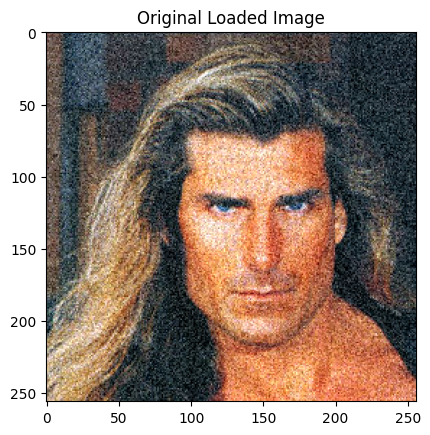

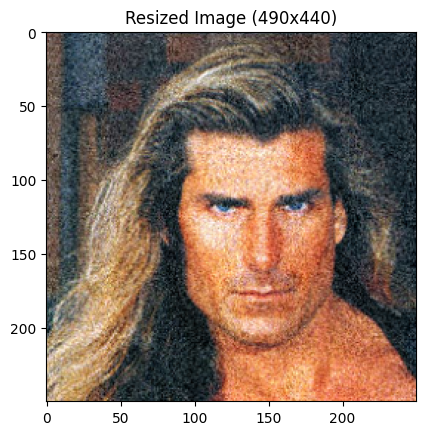

Noisy image max value (after normalization): 1.0
Noisy image min value (after normalization): 0.0


InvalidArgumentError: Graph execution error:

Detected at node functional_9_1/dense_16_1/MatMul defined at (most recent call last):
<stack traces unavailable>
Matrix size-incompatible: In[0]: [1,131072], In[1]: [344064,64]

Stack trace for op definition: 
File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-27-f6a1cd43ba36>", line 39, in <cell line: 39>
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 508, in predict
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 208, in one_step_on_data_distributed
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 198, in one_step_on_data
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 96, in predict_step
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call
File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph
File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 556, in call
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py", line 144, in call
File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/numpy.py", line 3445, in matmul
File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/numpy.py", line 477, in matmul

	 [[{{node functional_9_1/dense_16_1/MatMul}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_11694[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_11733]

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from skimage.io import imsave
import matplotlib.pyplot as plt

# Load the trained CNN denoising model/
# model = keras.models.load_model('/content/drive/MyDrive/imagedenoise/denoising_model.h5')

# Load the PNG image from Google Drive
image_path = '/content/drive/MyDrive/imagedenoise/gaussimage.png'
image_string = tf.io.read_file(image_path)
img_noisy = tf.image.decode_png(image_string, channels=3)

# Step 1: Display the loaded image before any preprocessing
plt.imshow(img_noisy.numpy())
plt.title("Original Loaded Image")
plt.show()

# Resize the image to (448, 384) as in the training dataset
img_noisy = tf.image.resize(img_noisy, (250, 250))

# Step 2: Display the resized image
plt.imshow(img_noisy.numpy().astype(np.uint8))
plt.title("Resized Image (490x440)")
plt.show()

# Apply the same rescaling used during training
img_noisy = tf.cast(img_noisy, tf.float32) / 255.0  # Normalize to [0, 1]

# Step 3: Check if normalization is working as expected
print("Noisy image max value (after normalization):", tf.reduce_max(img_noisy).numpy())
print("Noisy image min value (after normalization):", tf.reduce_min(img_noisy).numpy())

# Add a batch dimension (necessary for model prediction)
img_noisy = tf.expand_dims(img_noisy, axis=0)

# Pass the noisy image to the denoising model
denoised_img = autoencoder.predict(img_noisy)

# Convert the denoised image back to the original range [0, 255]
denoised_img = denoised_img[0] * 255.0  # Remove batch dimension and rescale
denoised_img = tf.clip_by_value(denoised_img, 0, 255)  # Clip values to valid range
denoised_img = denoised_img.numpy().astype(np.uint8)  # Convert to uint8 for saving and displaying

# Step 4: Display the denoised image after model prediction
plt.imshow(denoised_img)
plt.title("Denoised Image")
plt.axis('off')
plt.show()

# Save the denoised image
imsave('denoised_image.png', denoised_img)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import tensorflow as tf
import os
# List all image paths
TRAIN_NOISY_DIR = '/content/drive/MyDrive/imagedenoise/BSDS300/images/train'
# TRAIN_CLEAN_DIR= '/content/drive/MyDrive/imagedenoise/BSDS300/images/train/clean'

In [ ]:
# Create the noisy and clean datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_NOISY_DIR,
    image_size=(448, 384),  # Resize images to 448x384
    batch_size=5,
    label_mode='binary'
)

train_clean_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_CLEAN_DIR,
    image_size=(448, 384),  # Resize images to 448x384
    batch_size=5,
    label_mode=None
)

In [ ]:
rescale_layer = tf.keras.layers.Rescaling(scale=1./255)

In [ ]:
# Combine the noisy and clean datasets
train_dataset = tf.data.Dataset.zip((train_noisy_dataset, train_clean_dataset))

Apply the rescaling layer to the combined dataset
train_dataset_scaled = train_dataset.map(lambda x, y: (rescale_layer(x), rescale_layer(y)))

In [ ]:
# Get the dimensions of the noisy and clean images
for images in train_noisy_sclaed.take(1):
    noisy_image = images[0]
    print("Noisy image dimensions:", noisy_image.shape)

for images in train_clean_dataset.take(1):
    clean_image = images[0]
    print("Clean image dimensions:", clean_image.shape)